In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
signal_trees_no_reg = TreeIter(list(map(Tree,fc.eightb.accstudies_no_pu.signal_list)))
signal_trees = TreeIter(list(map(Tree,fc.eightb.accstudies_no_pu.signal_list)))
signal_trees_pu = TreeIter(list(map(Tree,fc.eightb.accstudies.signal_list)))

# signal_trees.extend(kwargs=lambda tree : dict(n_ext_jet=tree.n_jet-tree.nfound_presel))
# signal_trees.extend(kwargs=eightb.reco_all)
# signal_trees.extend(kwargs=eightb.reco_res_all)

In [3]:
def get_point(label):
    label = label.split('_')
    return str((int(label[1]),int(label[3])))
signal_points = list(map(get_point,signal_trees.sample))

In [4]:
dout = "gen_studies/resonances/"

tree = signal_trees[-2]
tree_no_reg = signal_trees_no_reg[-1]
tree_pu = signal_trees_pu[-2]

In [5]:
ylist = [
    f'gen_{y}'
    for y in ('Y1','Y2')
]

higgslist = [
    f'gen_{h}{y}'
    for y in ('Y1','Y2')
    for h in ('H1','H2')
]


quarklist = [
    f'gen_{h}{y}_{b}'
    for y in ('Y1','Y2')
    for h in ('H1','H2')
    for b in ('b1','b2')
]

In [6]:
varinfo.clear()

In [7]:
signal_trees.extend(kwargs=eightb.reco_all)
signal_trees.extend(kwargs=eightb.reco_res_all)

/uscms/home/ekoenig/nobackup/miniconda3/envs/torch-gpu/lib/python3.8/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(
/uscms/home/ekoenig/nobackup/miniconda3/envs/torch-gpu/lib/python3.8/site-packages/awkward/_connect/_numpy.py:209: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(


[None, None, None, None, None, None, None]

In [8]:
signal_trees_no_reg.extend(kwargs=lambda t : eightb.reco_all(t,use_regressed=False))
signal_trees_no_reg.extend(kwargs=eightb.reco_res_all)

[None, None, None, None, None, None, None]

In [9]:
signal_trees_pu.extend(kwargs=eightb.reco_all)
signal_trees_pu.extend(kwargs=eightb.reco_res_all)


[None, None, None, None, None, None, None]

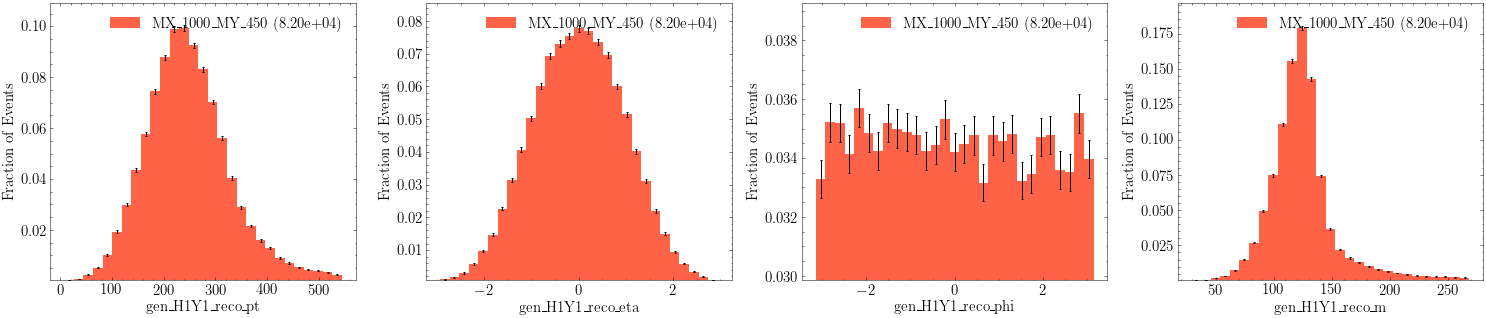

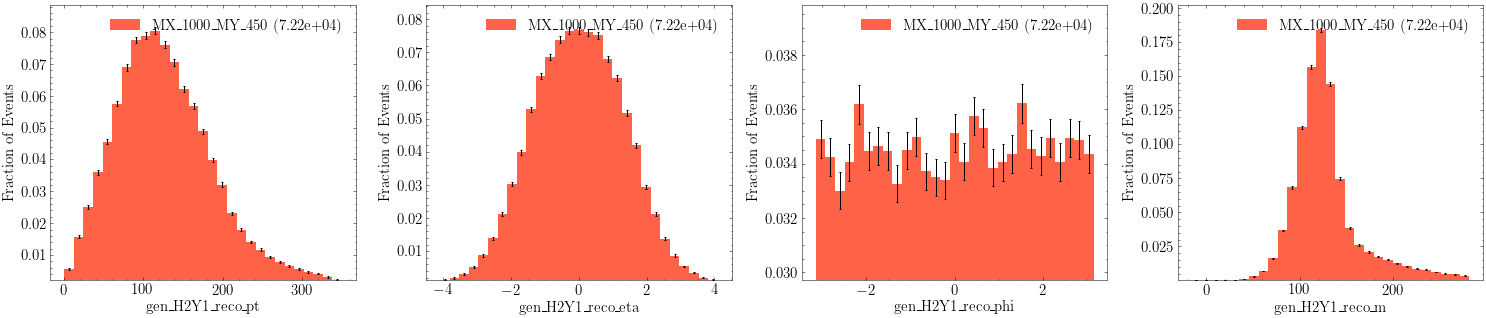

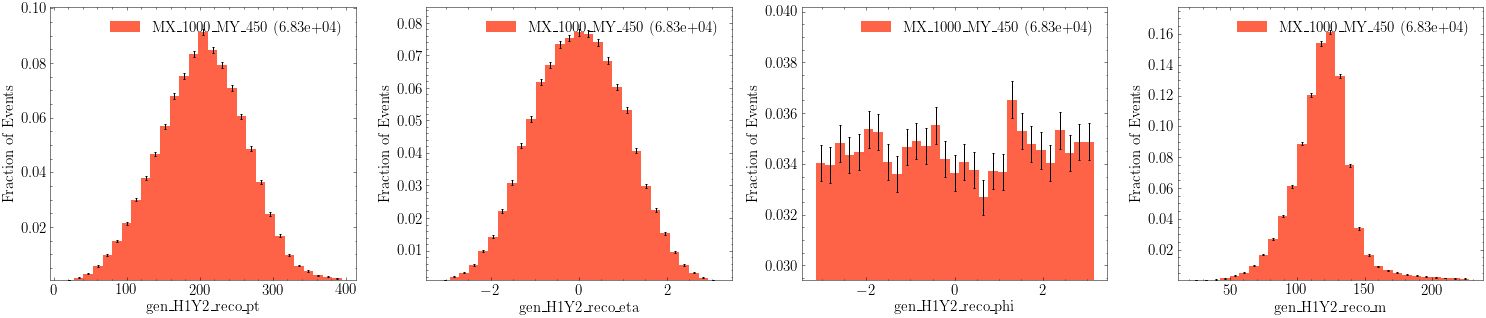

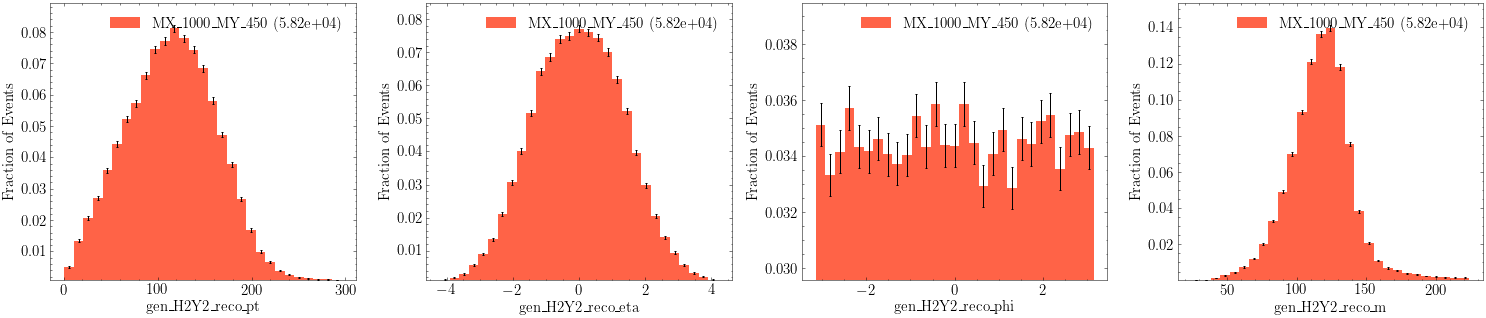

In [10]:
varlist = ['pt','eta','phi','m']

for higgs in higgslist:
    study.quick(
        [tree],
        masks=[tree[f'{higgs}_reco_matched']],
        varlist=[f'{higgs}_reco_{var}' for var in varlist],
        scale=False,
        density=1,
        dim=(-1,len(varlist)),
        saveas=f'{dout}/{higgs}'
    )

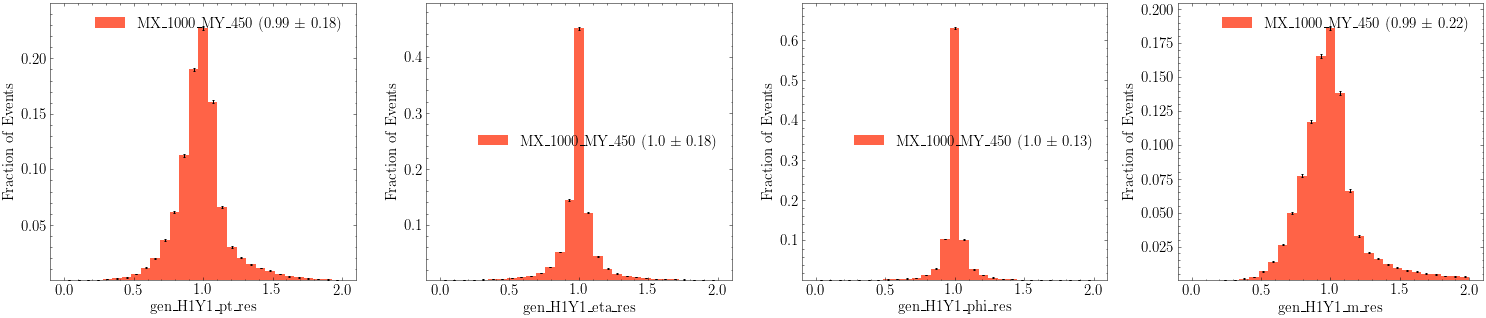

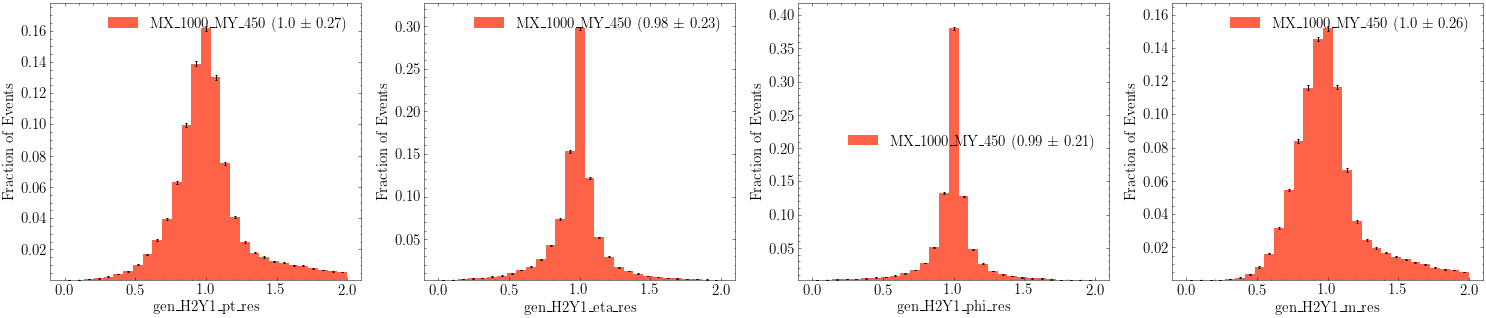

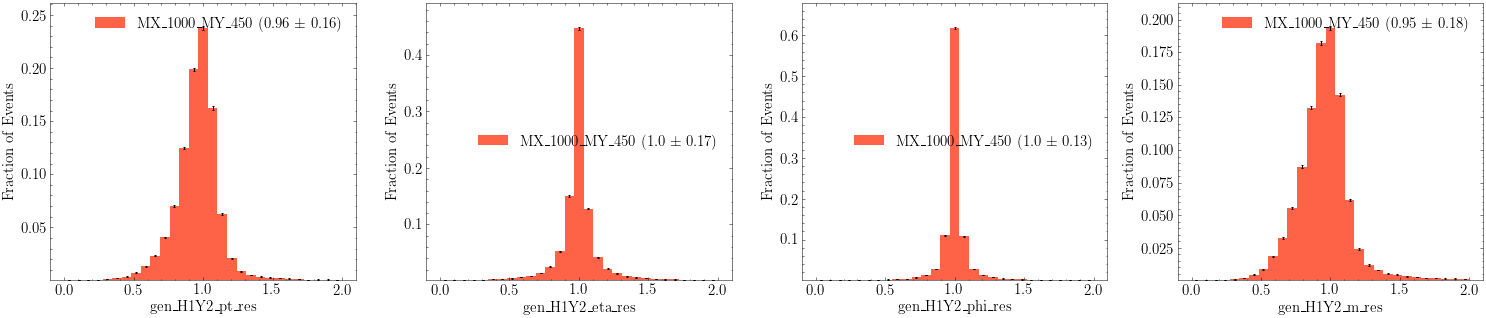

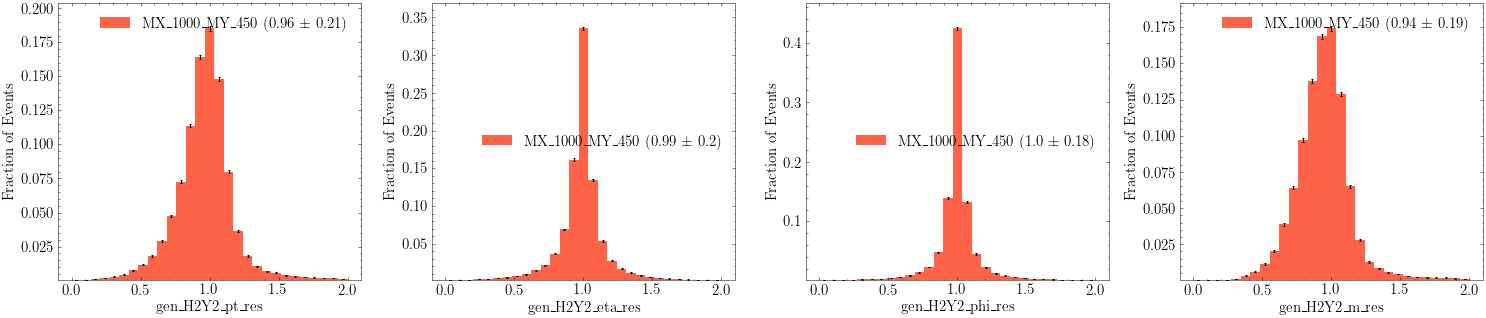

In [11]:

for higgs in higgslist:
    study.quick(
        [tree],
        masks=[tree[f'{higgs}_reco_matched']],
        varlist=[f'{higgs}_{var}_res' for var in varlist],
        scale=False,
        density=1,
        binlist=[np.linspace(0,2,30)]*len(varlist), 
        s_label_stat='mean_stdv',
        dim=(-1,len(varlist)),
        saveas=f'{dout}/{higgs}_res'
    )

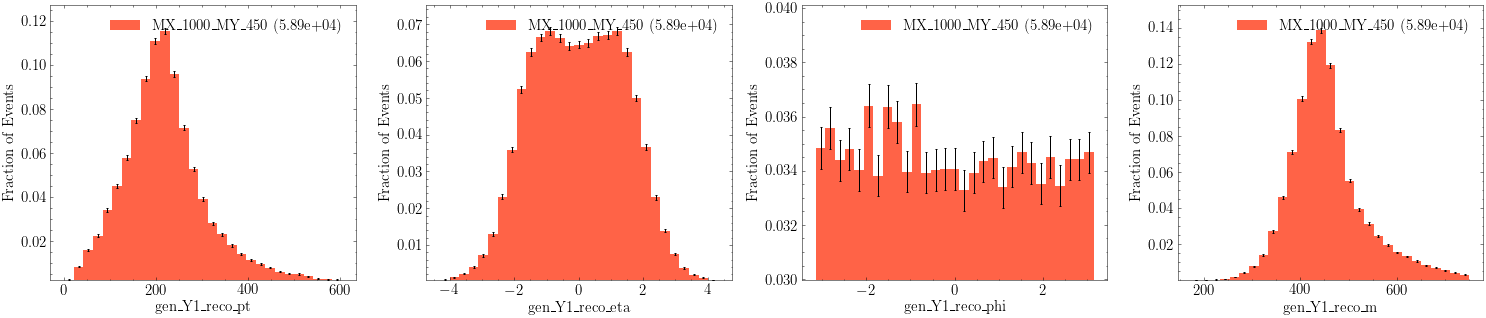

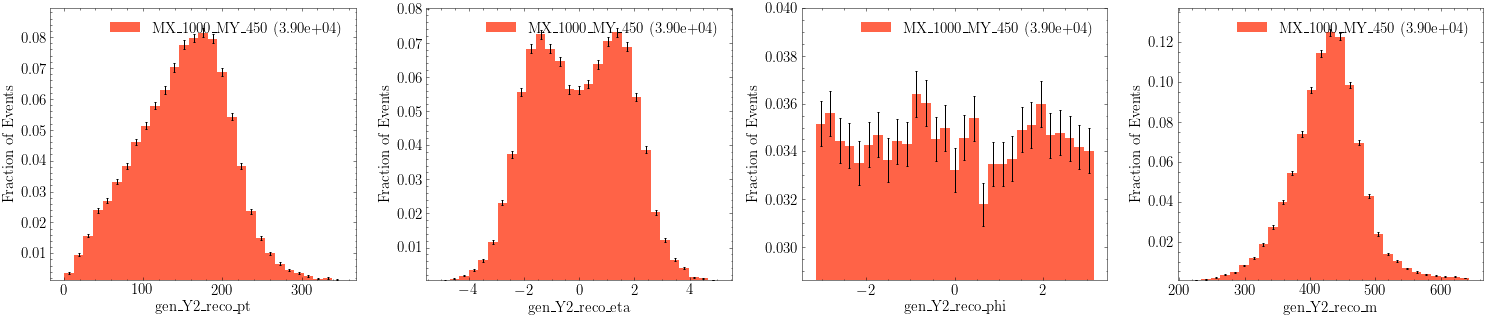

In [12]:
varlist = ['pt','eta','phi','m']

for y in ylist:
    study.quick(
        [tree],
        masks=[tree[f'{y}_reco_matched']],
        varlist=[f'{y}_reco_{var}' for var in varlist],
        scale=False,
        density=1,
        dim=(-1,len(varlist)),
        saveas=f'{dout}/{y}'
    )

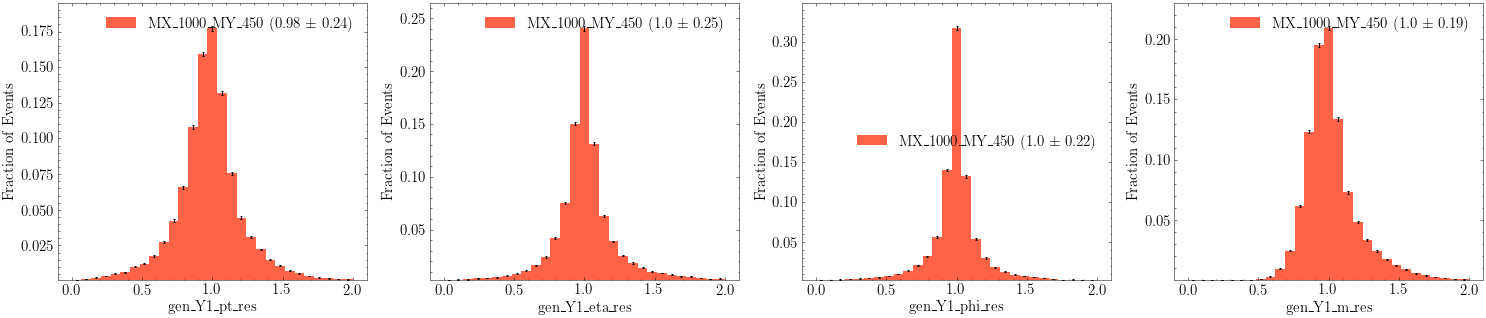

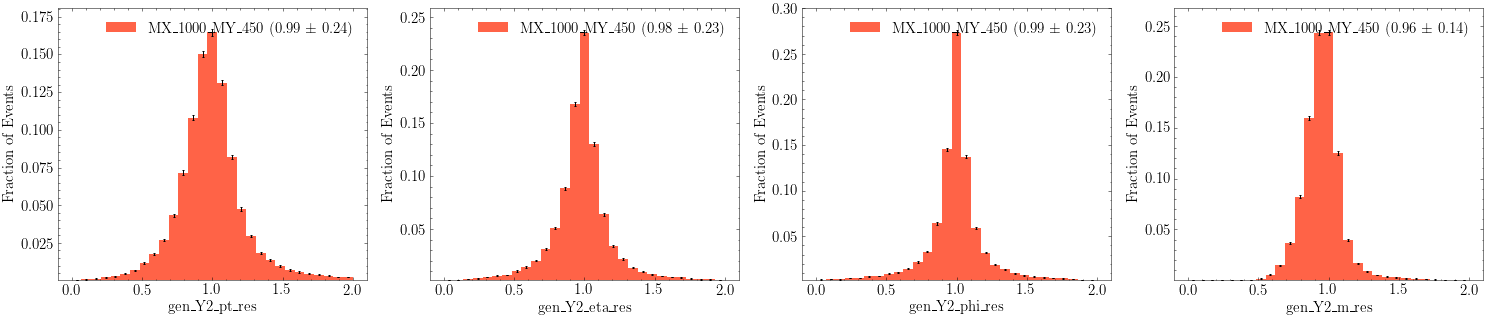

In [13]:
varlist = ['pt','eta','phi','m']

for y in ylist:
    study.quick(
        [tree],
        masks=[tree[f'{y}_reco_matched']],
        varlist=[f'{y}_{var}_res' for var in varlist],
        scale=False,
        density=1,
        binlist=[np.linspace(0,2,30)]*len(varlist), 
        s_label_stat='mean_stdv',
        dim=(-1,len(varlist)),
        saveas=f'{dout}/{y}_res'
    )

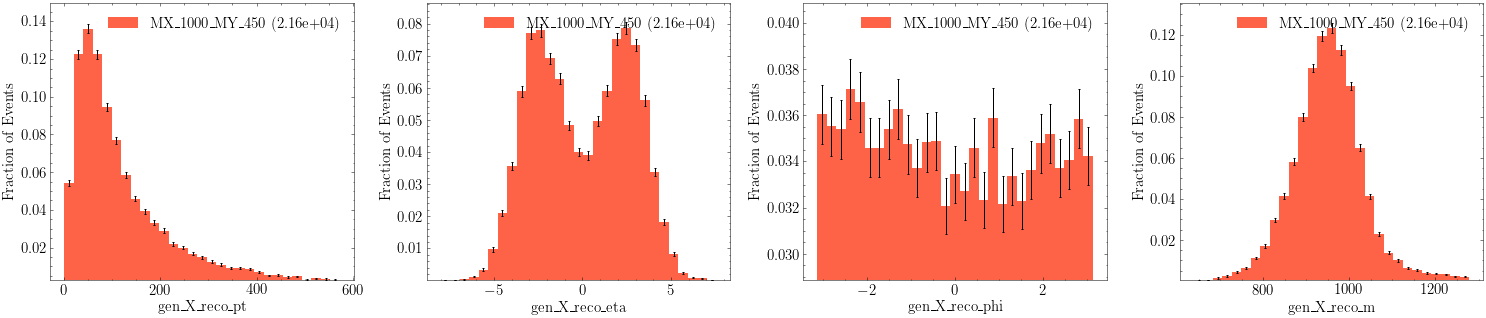

In [14]:
varlist = ['pt','eta','phi','m']

for x in ['gen_X']:
    study.quick(
        [tree],
        masks=[tree[f'{x}_reco_matched']],
        varlist=[f'{x}_reco_{var}' for var in varlist],
        scale=False,
        density=1,
        # binlist=[np.linspace(0,2,30)]*len(varlist), 
        # s_label_stat='mean_stdv',
        dim=(-1,len(varlist)),
        saveas=f'{dout}/{x}'
    )

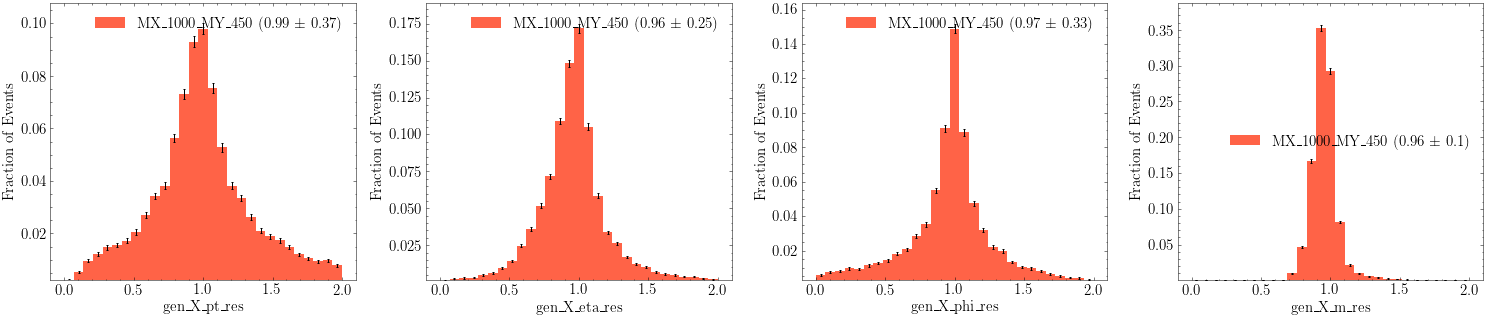

In [23]:
varlist = ['pt','eta','phi','m']
for x in ['gen_X']:
    study.quick(
        [tree,tree],
        masks=[tree[f'{x}_reco_matched']],
        varlist=[f'{x}_{var}_res' for var in varlist],
        scale=False,
        density=1,
        binlist=[np.linspace(0,2,30)]*len(varlist), 
        s_label_stat='mean_stdv',
        dim=(-1,len(varlist)),
        saveas=f'{dout}/{x}_res'
    )

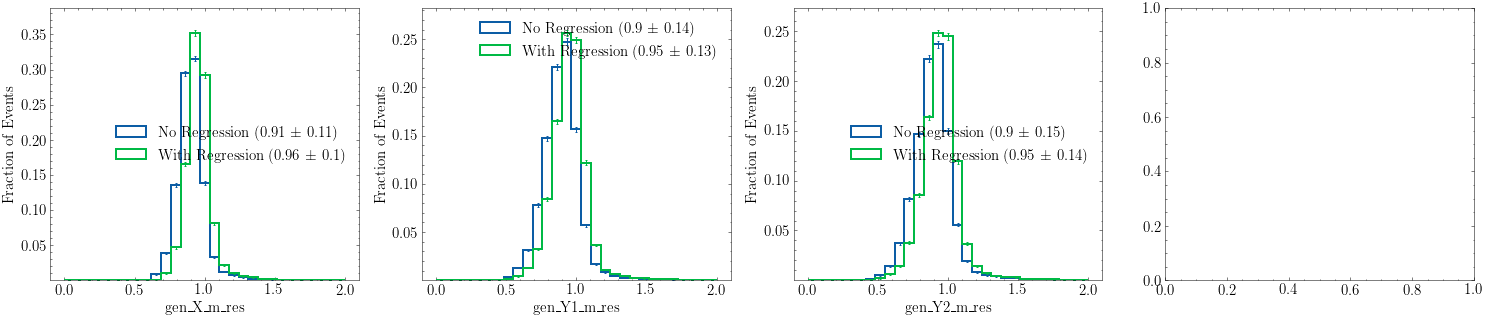

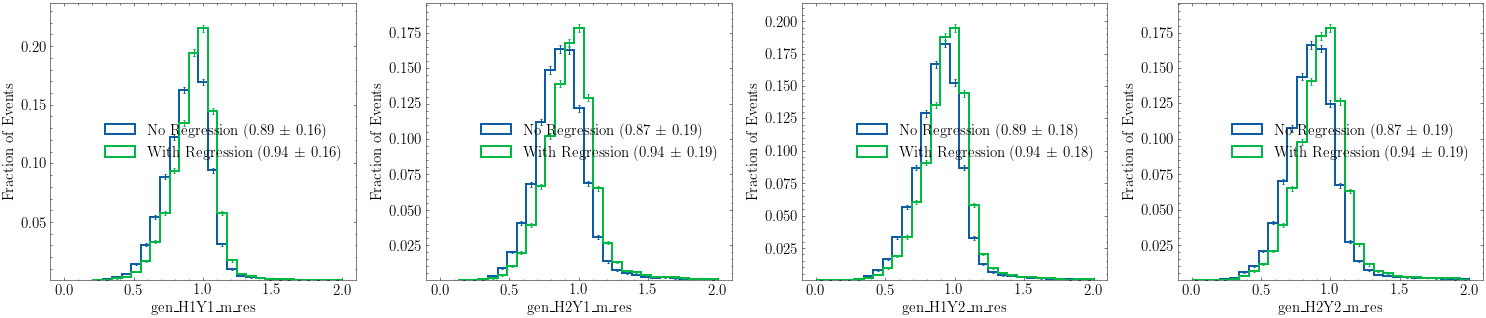

In [27]:
treeiter = TreeIter([tree_no_reg,tree])
study.quick(
    treeiter,
    masks=getattr(treeiter,f'gen_X_reco_matched'),
    varlist=[f'{a}_m_res' for a in ['gen_X']+ylist],
    scale=False,
    density=1,
    s_colors=[None],
    labels=["No Regression","With Regression"],
    binlist=[np.linspace(0,2,30)]*len(varlist), 
    s_label_stat='mean_stdv',
    dim=(-1,4),
    saveas=f'{dout}/xyy_reg_res'
)

study.quick(
    treeiter,
    masks=getattr(treeiter,f'gen_X_reco_matched'),
    varlist=[f'{a}_m_res' for a in higgslist],
    scale=False,
    density=1,
    s_colors=[None],
    labels=["No Regression","With Regression"],
    binlist=[np.linspace(0,2,30)]*len(varlist), 
    s_label_stat='mean_stdv',
    dim=(-1,4),
    saveas=f'{dout}/higgs_reg_res'
)

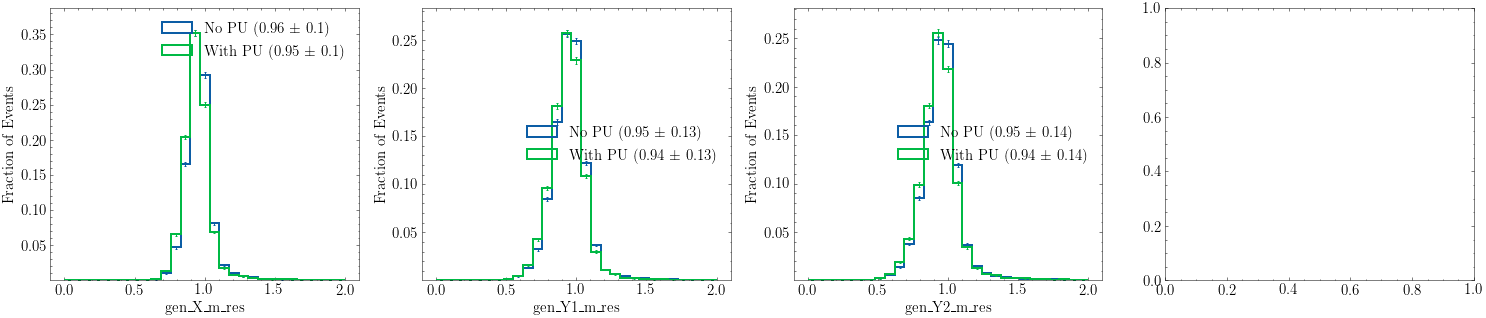

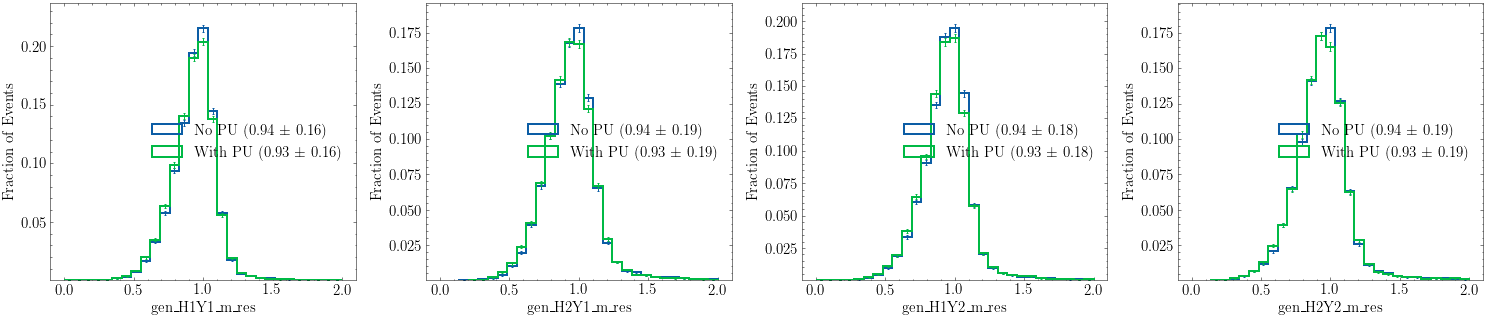

In [28]:
treeiter = TreeIter([tree,tree_pu])
study.quick(
    treeiter,
    masks=getattr(treeiter,f'gen_X_reco_matched'),
    varlist=[f'{a}_m_res' for a in ['gen_X']+ylist],
    scale=False,
    density=1,
    s_colors=[None],
    labels=["No PU","With PU"],
    binlist=[np.linspace(0,2,30)]*len(varlist), 
    s_label_stat='mean_stdv',
    dim=(-1,4),
    saveas=f'{dout}/xyy_pu_res'
)

study.quick(
    treeiter,
    masks=getattr(treeiter,f'gen_X_reco_matched'),
    varlist=[f'{a}_m_res' for a in higgslist],
    scale=False,
    density=1,
    s_colors=[None],
    labels=["No PU","With PU"],
    binlist=[np.linspace(0,2,30)]*len(varlist), 
    s_label_stat='mean_stdv',
    dim=(-1,4),
    saveas=f'{dout}/higgs_pu_res'
)